In [2]:
import numpy as np
import csv    #加载csv包便于读取csv文件
import zipfile
import os
import json
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
import datetime
import time
from datetime import timedelta

def date_2_timestamp(year,mon,day):
    tempString=str(year)+"-"+str(mon)+"-"+str(day)
    tempTime=time.strptime(tempString, "%Y-%m-%d")
    return time.mktime(tempTime)

def timestamp_2_date(un_time):
    return datetime.datetime.fromtimestamp(un_time)


def timestamp_removeDay_reduce(temp_timestamp):
    temp_date=timestamp_2_date(temp_timestamp)
    temp_timestamp=date_2_timestamp(temp_date.year,temp_date.month,1)
    return temp_timestamp

def timestamp_removeDay_add(temp_timestamp):
    temp_date=timestamp_2_date(temp_timestamp)
    if temp_date.month==12:
        return date_2_timestamp(temp_date.year+1,1,1)
    else:
        return date_2_timestamp(temp_date.year,temp_date.month+1,1)
    
def date_removeDay_reduce(temp_date):
    temp_timestamp=date_2_timestamp(temp_date.year,temp_date.month,1)
    return timestamp_2_date(temp_timestamp)

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

# 返回从最小到最大之间经过的时间戳，间隔为一个月
def max_min_2_timestampList(minDate,maxDate):    
    resList=[]
    resMap={}
    for single_date in daterange(minDate, maxDate):
        temp_date=date_removeDay_reduce(single_date)
        temp_timestamp=date_2_timestamp(temp_date.year,temp_date.month,temp_date.day)
        resMap[temp_timestamp]=1 

    for key in resMap.keys():
        resList.append(key)
    
    # print(resList)
    return sorted(resList)

def timestamp_2_string(temp_timestamp):
    temp_date=datetime.datetime.fromtimestamp(temp_timestamp)
    if temp_date.month<10:
        tempMonth="0"+str(temp_date.month)
    else:
        tempMonth=str(temp_date.month)
    return str(temp_date.year)+"-"+tempMonth

# punk 增值

In [4]:
df=pd.read_csv("/mnt/sde1/geth/nft_analyse_v1/data/sandwichBuy/csv/sandwich_withPrice.csv")

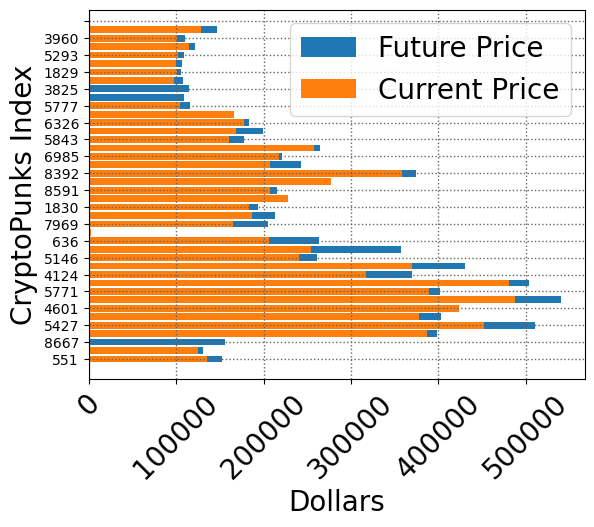

In [82]:
timestampList=list(set(df["timestamp"]))
timestampList.sort()
nftPriceList=[]
bidPriceList=[]
punkIndexList=[]

nftPriceMap={}
timestampMap={}

for timestamp in timestampList:
    nftPrice=df[df["timestamp"]==timestamp].iloc[1]["nftPrice"]
    ethPrice=df[df["timestamp"]==timestamp].iloc[1]["ethPrice"]
    nftPrice=float(nftPrice)*ethPrice
    nftPriceList.append(nftPrice)
    
    punkIndex=df[df["timestamp"]==timestamp].iloc[1]["punkIndex"]
    punkIndex=str(punkIndex)
    punkIndexList.append(punkIndex)
    
    bidPrice=df[df["timestamp"]==timestamp].iloc[0]["value"]
    bidPrice=float(bidPrice)/1e18*ethPrice
    bidPriceList.append(bidPrice)

    timestampMap[timestamp]={"bidPrice":bidPrice,"punkIndex":punkIndex,"nftPrice":nftPrice}
    
    nftPriceMap[nftPrice]=timestamp
    
    
# nftPriceList.sort()
# bidPriceList=[]
# punkIndexList=[]
# for nftPrice in nftPriceList:
#     timestamp=nftPriceMap[nftPrice]
    
#     bidPriceList.append(timestampMap[timestamp]["bidPrice"])
#     punkIndexList.append(timestampMap[timestamp]["punkIndex"])


    
plt.barh(punkIndexList,nftPriceList,label='Future Price')
plt.barh(punkIndexList,bidPriceList,label='Current Price')
plt.legend(fontsize=20,loc=1)
plt.grid(True, color='#666666', linestyle = ":", linewidth = "1")

plt.xlabel('Dollars', fontsize=20)
plt.ylabel('CryptoPunks Index', fontsize=20)
plt.xticks(fontsize=20,rotation=45)
plt.yticks(range(0,len(punkIndexList),2),fontsize=10)

plt.savefig("/mnt/sde1/geth/nft_analyse_v1/data/sandwichBuy/photo/sandwichBuy_punkPrice.pdf",bbox_inches='tight')

# 交易位置

list_key:  ['2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09']
list_value:  [[0, 0, 2], [], [1, 0, 0, 1, 0], [1], [0, 2, 5, 1, 3, 0, 0], [0, 0, 0, 0, 6, 0], [3], [0, 0], [0, 0, 0, 0, 0], [3, 0], [0, 0], [0, 1], [0, 2, 5, 0], [2]]


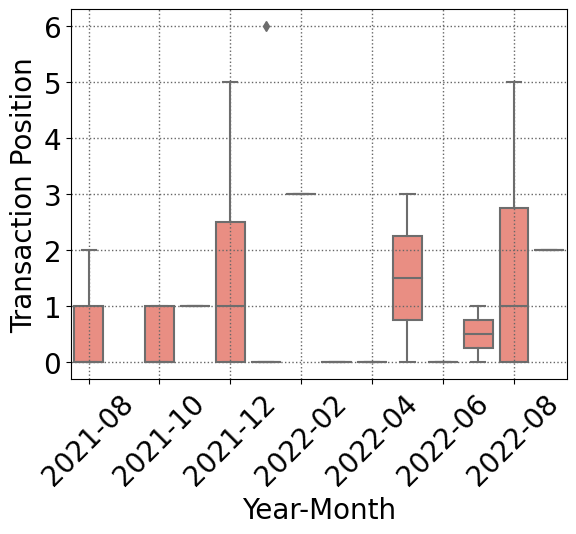

In [79]:
import numpy as np
import csv    #加载csv包便于读取csv文件
import zipfile
import os
import json
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

df=pd.read_csv("/mnt/sde1/geth/nft_analyse_v1/data/sandwichBuy/csv/sandwich_withPrice.csv")

tx_map={}

# for index,row in df.iterrows():
#     transactionHash=row["transactionHash"]
#     position=row["position"]
#     timestamp=row["timestamp"]
#     timestamp=timestamp_removeDay_reduce(timestamp)

#     tx_map[ transactionHash] = {"timestamp":int(timestamp), "position":position}
    
for index in range(0,len(df),3):
    transactionHash=df.iloc[index]["transactionHash"]
    position=df.iloc[index]["position"]
    timestamp=df.iloc[index]["timestamp"]
    timestamp=timestamp_removeDay_reduce(timestamp)

    tx_map[ transactionHash] = {"timestamp":int(timestamp), "position":position}
    

timestamp_map={}

for key,value in tx_map.items():
    timestamp=value["timestamp"]
    position=value["position"]
    try:
        timestamp_map[timestamp].append(position)
    except:
        timestamp_map[timestamp]=[position]
        

        
list_key=[]
list_value=[]
minDate=datetime.datetime.fromtimestamp( min(df["timestamp"]) )
maxDate=datetime.datetime.fromtimestamp( max(df["timestamp"]) )

for tempTimestamp in max_min_2_timestampList(minDate,maxDate):
    if tempTimestamp not in timestamp_map:
        timestamp_map[tempTimestamp]=[]
    
    list_key.append(timestamp_2_string(tempTimestamp))
    list_value.append( timestamp_map[tempTimestamp] )
    
print("list_key: ",list_key)
print("list_value: ",list_value)

# fig,axes=plt.subplots(1,1,figsize = (15, 3))
# ax=axes
sns.boxplot(data=list_value,color="salmon")

x = np.arange(len(list_key)) 
plt.xlabel('Year-Month', fontsize=20)
plt.ylabel('Transaction Position', fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True, color='#666666', linestyle = ":", linewidth = "1")


tempX=[]
tempLabel=[]
for i in range(0,len(list_key),2):
    tempX.append(i)
    tempLabel.append(list_key[i])
plt.xticks(tempX,labels=tempLabel,fontsize=20,rotation=45)
plt.savefig("/mnt/sde1/geth/nft_analyse_v1/data/sandwichBuy/photo/sandwichBuy_txpos.pdf",bbox_inches='tight')
